In [14]:
import os

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2




In [15]:
from google.colab import drive 
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


# 식물 부위 이름 정의

In [16]:
plant_type_names = ['꽃', '열매', '잎']

# 식물 이름 정의

In [17]:
flower_names = ['메밀', '큰조롱', '참꽃나무', '황근', '해국']
fruit_names = ['까마귀쪽나무', '좁은 잎천선과', '구실잣밤나무', '돈나무', '순비기나무', '참가시나무', '황근', '백량금']
leaf_names = ['참식나무', '메밀']

# 테스트 파일 읽기

(224, 224, 3)


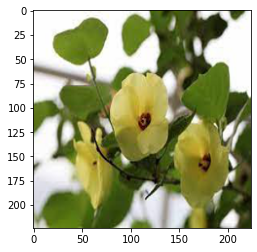

In [30]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

im = pilimg.open('test2.jpeg')
#im = pilimg.open('iris1.jpeg')
im = im.resize((224,224))

test_image = np.array(im)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [31]:
loaded_model_1 = keras.models.load_model("/content/mnt/MyDrive/tmp/plant_type_model.h5")
loaded_model_2 = keras.models.load_model("/content/mnt/MyDrive/tmp/flower_model.h5")
loaded_model_3 = keras.models.load_model("/content/mnt/MyDrive/tmp/fruit_model.h5")
loaded_model_4 = keras.models.load_model("/content/mnt/MyDrive/tmp/leaf_model.h5")

In [33]:
THRESHOLD = 0.95

test_data = test_image.reshape((1, 224, 224, 3))
y_1 = loaded_model_1.predict(test_data)
print(y_1)
predicted_index_1 = np.argmax(y_1, axis=-1)[0]
print(predicted_index_1)
confidence_1 = y_1[0][predicted_index_1]
print(confidence_1)
print('------')
y_2 = loaded_model_2.predict(test_data)
print(y_2)
predicted_index_2 = np.argmax(y_2, axis=-1)[0]
print(predicted_index_2)
confidence_2 = y_2[0][predicted_index_2]
print(confidence_2)
print('------')
y_3 = loaded_model_3.predict(test_data)
print(y_3)
predicted_index_3 = np.argmax(y_3, axis=-1)[0]
print(predicted_index_3)
confidence_3 = y_3[0][predicted_index_3]
print(confidence_3)
print('------')
y_4 = loaded_model_4.predict(test_data)
print(y_4)
predicted_index_4 = np.argmax(y_4, axis=-1)[0]
print(predicted_index_4)
confidence_4 = y_4[0][predicted_index_4]
print(confidence_4)
print('------')
print(plant_type_names[predicted_index_1])
     

[[9.9999821e-01 7.1413453e-10 1.7554244e-06]]
0
0.9999982
------
[[9.8835883e-08 1.1121387e-07 1.3176150e-11 9.9999952e-01 1.9900764e-07]]
3
0.9999995
------
[[1.2972431e-01 2.2801640e-05 4.8787447e-06 7.4238646e-01 1.2310196e-01
  4.5316061e-03 1.7291233e-04 5.5119246e-05]]
3
0.74238646
------
[[0.9944634  0.00553658]]
0
0.9944634
------
꽃


In [34]:
if (confidence_1 > THRESHOLD):
  if predicted_index_1 == 0:
    if (confidence_2 > THRESHOLD):
      print("predicted as {}의 {} with confidence {},{}".format(flower_names[predicted_index_2], plant_type_names[predicted_index_1], confidence_1, confidence_2))
    else:
      print("unknown. confidence = {}".format(confidence_1, confidence_2))
  if predicted_index_1 == 1:
    if (confidence_3 > THRESHOLD):
      print("predicted as {}의 {} with confidence {},{}".format(fruit_names[predicted_index_3], plant_type_names[predicted_index_1], confidence_1, confidence_3))
    else:
      print("unknown. confidence = {}".format(confidence_1, confidence_3))
  if predicted_index_1 == 2:
    if (confidence_4 > THRESHOLD):
      print("predicted as {}의 {} with confidence {},{}".format(leaf_names[predicted_index_4], plant_type_names[predicted_index_1], confidence_1, confidence_4))
    else:
      print("unknown. confidence = {}".format(confidence_1, confidence_4))
else:
  print("unknown. confidence = {}".format(confidence_1))

predicted as 황근의 꽃 with confidence 0.9999982118606567,0.9999995231628418
